# Week 9
## Principal Component Analysis (PCA)

PCA Assumptions:

    - Linear relationship between all variables
    
    - Sampling Adequacy
        - Minimum of ~150 observations
        - Generally 5-10 observations per variable
    
    - Adquate correlation between variables
        - Bartlett's Test of Sphericity
    
    - No significant outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_excel('Chapter3_Completions_DataSet.xlsx')

In [3]:
df.describe()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
count,144.000000,144.000000,144.000000,144.000000
mean,197.908333,39.713194,2949.275000,57.986111
std,28.411963,5.702597,1414.559452,37.618435
min,146.200000,26.000000,798.000000,5.000000
25%,173.400000,36.400000,1197.000000,15.000000
50%,193.800000,39.000000,3351.600000,65.000000
75%,217.600000,42.900000,4069.800000,90.000000
max,268.600000,57.200000,5506.200000,125.000000


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler() #standardize the data set using “standard scaler” library

In [6]:
scaler.fit(df)

StandardScaler()

In [7]:
scaled_features= scaler.transform(df)

In [8]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

the next step is to change the scaled features (standardized data)
from a numpy array to a data frame for ease of using in the PCA.

In [9]:
scaled_features=pd.DataFrame(scaled_features, columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])

In [10]:
scaled_features.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053


In [11]:
from sklearn.decomposition import PCA #let’s import PCA from “sklearn.decomposition” 

In [12]:
PCA= PCA(n_components=2) # apply two principal components to the scaled features as follows.

two principal components have been achieved which essentially indicate transforming the data set from four features to two features and reducing the data sets’ dimensionality.

In [13]:
PCA.fit(scaled_features)

PCA(n_components=2)

In [14]:
Transformed_PCA=PCA.transform(scaled_features)

In [15]:
Transformed_PCA

array([[-2.20401503,  0.49230415],
       [-2.01847823, -0.65257072],
       [-2.3001967 , -0.3263588 ],
       [-2.23481144, -0.5804819 ],
       [-2.32844843,  0.65610591],
       [-2.01570154,  1.4935046 ],
       [-2.37840516,  0.05716489],
       [-2.17148144,  0.23678942],
       [-2.26829929, -1.09568622],
       [-2.12311515, -0.44880128],
       [-2.10815144,  1.05406075],
       [-2.26338126,  0.14507647],
       [-2.15628491, -0.70709925],
       [-2.56671864, -0.94403556],
       [-2.14337646,  1.8671572 ],
       [-2.20456595,  2.68214851],
       [-2.14710823,  1.48793811],
       [-2.12858409,  0.50028039],
       [-1.84194759,  1.41483116],
       [-2.2819054 ,  1.13273419],
       [-1.85627512,  0.42578182],
       [-2.1444168 ,  0.93035638],
       [-2.7093581 ,  0.46433027],
       [-1.75505189,  0.09969964],
       [-2.16482624,  0.14925134],
       [-1.89039914, -0.60323518],
       [-1.9877679 ,  0.25413354],
       [-2.10878761,  0.54024806],
       [-2.07958163,

In [16]:
scaled_features.shape

(144, 4)

In [17]:
Transformed_PCA.shape

(144, 2)

let’s plot these generated principal components

Text(0, 0.5, 'Second Principal Component')

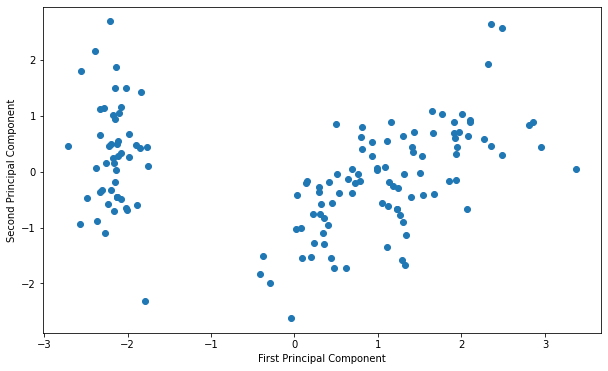

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(Transformed_PCA[:,0],Transformed_PCA[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

To get the eigenvectors of each principal component which are the coefficients
of each variable for the first component versus the coefficients for the
second component we can use "PCA.components_"

In [19]:
PCA.components_

array([[ 0.51942738, -0.27127608,  0.58031336,  0.56554477],
       [ 0.38765923,  0.91953234,  0.02458254,  0.05980205]])

These scores provide an insight on the variables that have the largest impact on each of the generated two principal components

In [20]:
df_components = pd.DataFrame(PCA.components_,columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])
df_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802


cluster spacing has the largest impact on the second principal
component with a **score of 0.919532**

Let’s also visualize this using a heat map via the seaborn library.

<AxesSubplot:>

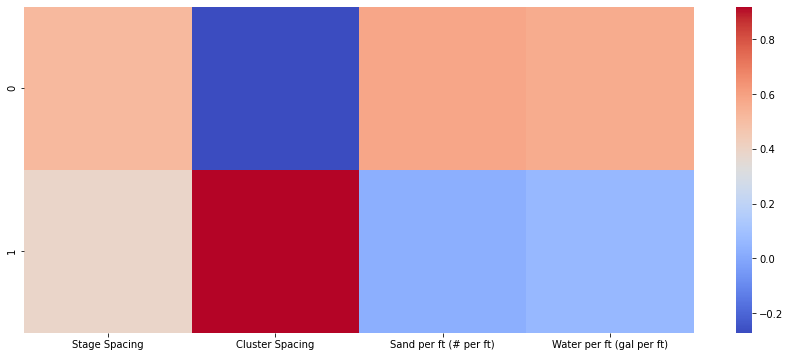

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(df_components,cmap='coolwarm')

The heat map illustrates the relationship between correlations of various
features and the principal components. Each principal component is shown as
a row and the principal components with the higher scores are more correlated
to a specific feature in the columns. This helps identifying the features that are specifically important for each principal component.

In [22]:
transformed_PCA= pd.DataFrame(Transformed_PCA, columns=['First Principal Component', 'Second Principal Component'])

The reduced versions of these principal components can now be used for feeding into a ML model.

In [23]:
transformed_PCA.to_csv('Two Principal Components.csv')

**Standard deviation:**
- Eigenvalues (since our data has been standaradized)

In [24]:
print(np.sqrt(PCA.explained_variance_))

[1.71540628 0.96093219]


**Porpotion of Variance:**
- The amount of variance the conpnent accounts for in the data

In [25]:
print(PCA.explained_variance_ratio_)

[0.73054596 0.22924456]


**Cumulative Porportion:**
- Accumulated amount of explained variance

In [26]:
print(PCA.explained_variance_ratio_.cumsum())

[0.73054596 0.95979052]


#### Selection of K

In [27]:
from sklearn.decomposition import PCA #let’s import PCA from “sklearn.decomposition” 
PCA4= PCA(n_components=4)
PCA4.fit(scaled_features)
Transformed_PCA4=PCA4.transform(scaled_features)

Text(0.5, 0.85, 'Eigenvalue=1')

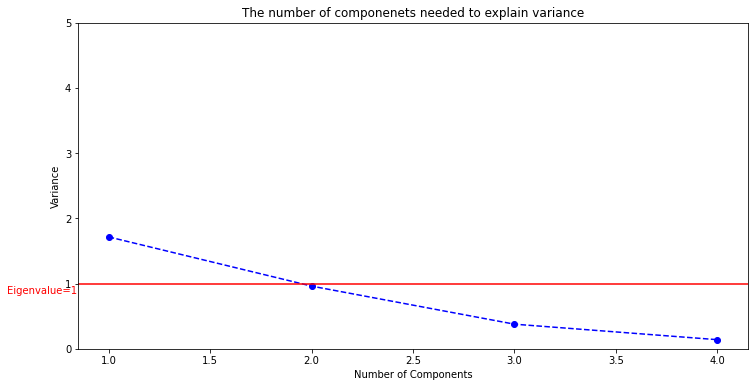

In [33]:
#screeplot of PCAs
plt.rcParams["figure.figsize"]=(12,6)

fig,ax=plt.subplots()
xi=np.arange(1,5, step=1)
y =np.sqrt(PCA4.explained_variance_)
plt.ylim(0.0,5)
plt.plot(xi,y,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('The number of componenets needed to explain variance')

plt.axhline(y=1,color='r',linestyle='-')
plt.text(0.5,0.85, 'Eigenvalue=1',color='red',fontsize=10)

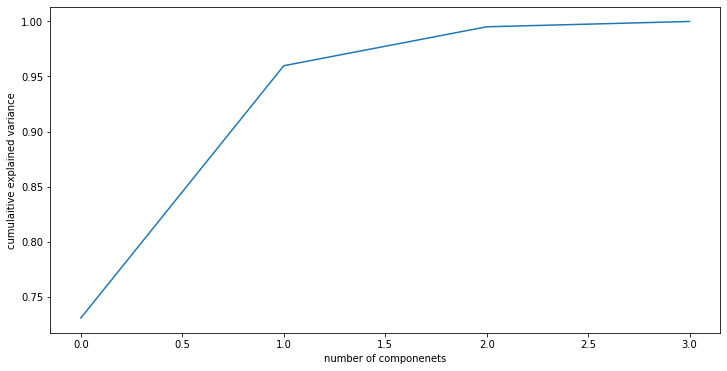

In [38]:
# cumulative variance explained
plt.plot(np.cumsum(PCA4.explained_variance_ratio_))
plt.xlabel('number of componenets')
plt.ylabel('cumulaitive explained variance')
plt.show()

NEXT: What can we do with my components?
- On your own, try applying logistic regression only 2 components and another logistic regression model with full features. What are your observations ?